In [16]:
import cv2
import numpy as np

# Load image
image = cv2.imread("D:/DATA/APPLE/Roboflow/train/apple--5-_jpg.rf.df3272b8bb655667c5414e465400e0d9.jpg")
image = cv2.imread(
    "D:/DATA/APPLE/Roboflow/train/apple--3-_jpg.rf.67616aed2bdab174160bc3219cf0de46.jpg"
)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for red apples (adjust as needed)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_red, upper_red)
segmented = cv2.bitwise_and(image, image, mask=mask)

In [17]:
kernel = np.ones((5, 5), np.uint8)
cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

Number of apples: 34


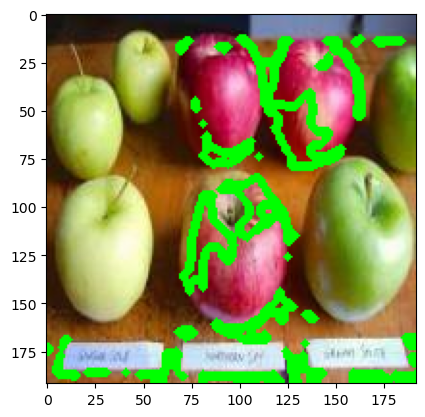

In [18]:
contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
apple_count = len(contours)

# Draw contours
for contour in contours:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 3)

print(f"Number of apples: {apple_count}")

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.imshow("Original", image)

In [19]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(cleaned_mask)
apple_count = len(keypoints)
print(f"Number of apples: {apple_count}")

Number of apples: 0


Number of apples: 0


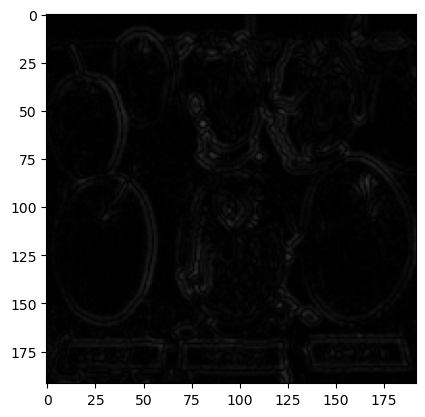

In [23]:
import cv2
import numpy as np

# Load the image
# image = cv2.imread("apples.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Laplacian filter
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # Convert back to 8-bit image

# Threshold to create binary image
_, binary = cv2.threshold(laplacian, 50, 255, cv2.THRESH_BINARY)

# Perform morphological operations
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count and draw contours
apple_count = 0
for contour in contours:
    if cv2.contourArea(contour) > 100:  # Filter by minimum area
        apple_count += 1
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Display results
print(f"Number of apples: {apple_count}")
# cv2.imshow("Original Image", image)
# cv2.imshow("Laplacian", laplacian)
# cv2.imshow("Binary Mask", binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
plt.show()